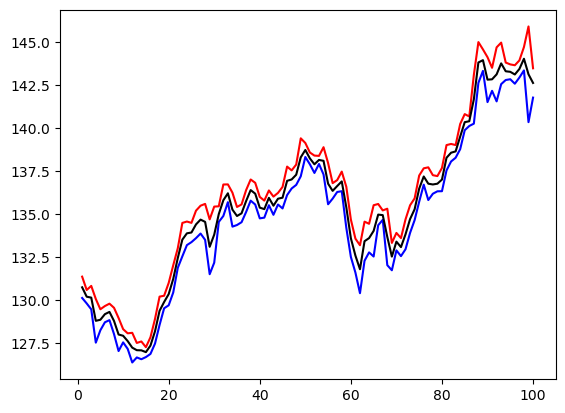

UpDiffAve 0.7440049999999999
DownDiffAve -0.7440050000000002
UpSig 0.38695782389686934
DownSig 0.3869578238968696


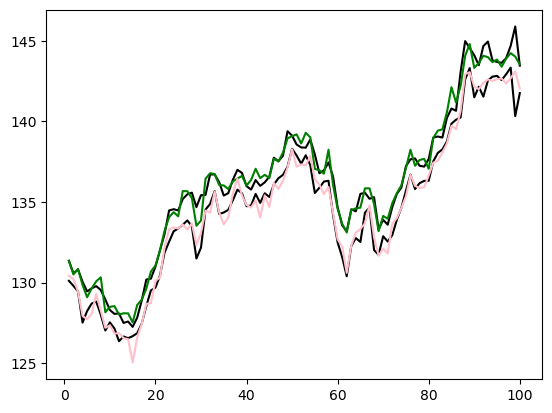

aveMean -0.018441176470588017
aveSig 0.7121628337455929
[2.1208743363512053, 0.0, 0.0, 0.0, 0.0, -1.368946401416886, 0.0, 0.0, 0.0, 0.0, -0.6854372395551707, 0.0, 0.0, 0.0, 0.0, 0.22614881370485543, 0.0, 0.0, 0.0, 0.0, 0.6813206565380161, 0.0, 0.0, 0.0, 0.0, -0.3609105141212909, 0.0, 0.0, 0.0, 0.0, -0.6039399210845614, 0.0, 0.0, 0.0, 0.0, -0.6468329722375856, 0.0, 0.0, 0.0, 0.0, -0.750343249750366, 0.0, 0.0, 0.0, 0.0, 0.6060842897554307, 0.0, 0.0, 0.0, 0.0, -2.727684422325519, 0.0, 0.0, 0.0, 0.0, -0.6443107632803627, 0.0, 0.0, 0.0, 0.0, 1.7868919558792742, 0.0, 0.0, 0.0, 0.0, 1.8449173270979706, 0.0, 0.0, 0.0, 0.0, -1.0435062333337397, 0.0, 0.0, 0.0, 0.0, -1.8672808928588698, 0.0, 0.0, 0.0, 0.0, 0.4693534035658767, 0.0, 0.0, 0.0, 0.0, 0.12452386710836498, 0.0, 0.0, 0.0, 0.0, -0.18046148149201557, 0.0, 0.0, 0.0, 0.0, 0.26212973983316273, 0.0, 0.0, 0.0, 0.0]


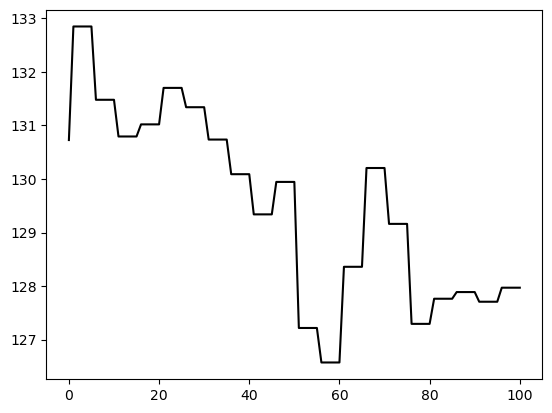

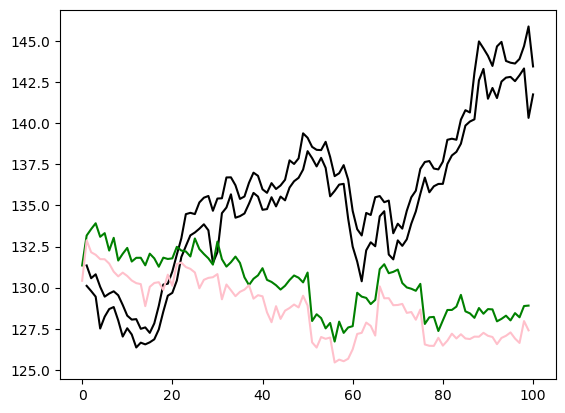

pseudoPoint 0.69
pseudoScore 0.4401572000000016
point 0.37
Score -0.22453759999999984


In [105]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def rand2d(N,aveSig):
    dist=[]
    x=0
    y=0
    for i in range(N):
        x=np.random.normal(0,aveSig)
        y=np.random.normal(0,aveSig)
        sig=np.random.normal(0,1) 
#        dist.append(sig*math.sqrt(x**2+y**2))
        dist.append(sig*math.sqrt(y**2))
    
    return dist


def calculate_mean(data):#https://qiita.com/JunJun0706/items/9d1befb90a823c466c32

    s = sum(data)
    N = len(data)
    mean =s/N

    return mean

#平均からの偏差を求める
def find_difference(data):#https://qiita.com/JunJun0706/items/9d1befb90a823c466c32

    mean = calculate_mean(data)
    diff = []

    for num in data:
        diff.append(num-mean)
    return diff

def calculate_variance(data):#https://qiita.com/JunJun0706/items/9d1befb90a823c466c32

    diff = find_difference(data)
    #差の２乗を求める
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)

    #分散を求める
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff/len(data)
    return variance

csv_file= open("./USDJPY_1664100989583.csv", "r", encoding="ms932", errors="", newline="" )
#リスト形式
f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)


cnt=0
day=[]
data1=[]
data2=[]
data3=[]
data4=[]
for row in f:
    #rowはList
    #row[0]で必要な項目を取得することができる
    day.append(float(row[0]))
    data1.append(float(row[1]))
    data2.append(float(row[2]))
    data3.append(float(row[3]))
    data4.append(float(row[4]))

N=100
daycut=[]
data1cut=[]
data2cut=[]
data3cut=[]
data4cut=[]
for i in range(N):
    daycut.append(day[i])
    data1cut.append(data1[i])
    data2cut.append(data2[i])
    data3cut.append(data3[i])
    data4cut.append(data4[i])
    
    
#print(data2)
#plt.plot(daycut,data1cut,marker='o',color="black")
plt.plot(daycut,data2cut,color="red")
plt.plot(daycut,data3cut,color="blue")
#plt.plot(daycut,data4cut,marker='o',color="green")

average=[]
for i in range(N):
    average.append((data2[i]+data3[i])/2)
    
plt.plot(daycut,average,color="black")
plt.savefig("original.png") 
plt.show()

diff=[]
dataUpDiff=[]
dataDownDiff=[]
for i in range(N):
    dataUpDiff.append(data2[i]-average[i])
    dataDownDiff.append(data3[i]-average[i])

    
#plt.plot(daycut,dataUpDiff,color="red")
#plt.plot(daycut,dataDownDiff,color="blue")
#plt.show()
aveUp=calculate_mean(dataUpDiff)
aveDown=calculate_mean(dataDownDiff)
print('UpDiffAve',aveUp)
print('DownDiffAve',aveDown)
varUp=calculate_variance(dataUpDiff)
varDown=calculate_variance(dataDownDiff)

stdUp=varUp**0.5
stdDown=varDown**0.5

print('UpSig',stdUp)
print('DownSig',stdDown)

GaussUp=[]
GaussDown=[]
for i in range(N):
    mx=np.random.normal(aveUp,stdUp)
    mn=np.random.normal(aveDown,stdDown)
    GaussUp.append(max(mx,mn))
    GaussDown.append(min(mx,mn))
    
pseudoDataUp=[]
pseudoDataDown=[]   
for i in range(N):
    pseudoDataUp.append(average[i]+GaussUp[i])
    pseudoDataDown.append(average[i]+GaussDown[i])
    
plt.plot(daycut,data2cut,color="black")
plt.plot(daycut,data3cut,color="black")
plt.plot(daycut,pseudoDataUp,color="green")
plt.plot(daycut,pseudoDataDown,color="pink")
plt.savefig("pseudo.png")
plt.show()

avediff=[]
for i in range(N-1):
    avediff.append(average[i+1]-average[i])

M=3
aveMeanDiff=[0]*M
for i in range(0,(N-1)//M):
    aveMD=0
    for j in range(M):
        aveMD+=(average[i*M-j+1]-average[i*M-j])/M
        aveMeanDiff.append(aveMD)
    
#plt.plot(range(len(aveMeanDiff)),aveMeanDiff,color="black")
#plt.show()


aveMean=calculate_mean(aveMeanDiff)
aveSig=calculate_variance(aveMeanDiff)**0.5
print('aveMean',aveMean)
print('aveSig',aveSig)
#print(average[N-1]-average[0])

Drift=0.5
RateDrift=0

newave=[average[0]]
smooth=2.5
step=5
rdsub=rand2d(N//step,aveSig*smooth)
rdlist=[]
for r in rdsub:
    for i in range(step):
        if i==0:
            rdlist.append(r)
        else:
            rdlist.append(float(0.0000000000000000000000))
print(rdlist)
for i in range(N):
#for i in range(N//M):
#    RateDown=random.random()
#    RateUp=1-RateDown
#    rd=(average[N-1]-average[0])/M*Drift+np.random.normal(0,aveSig)
#    rd=np.random.normal(0,aveSig)
    rd=rdlist[i]
#    if i>2:
#        Drift=newave[i-1]-newave[i-2]
#        rd=Drift+np.random.normal(0,aveSig)
#    rd=random.uniform(RateDown*aveMean,RateUp*aveMean)
#    if(rd>=0):
#        rd=RateDrift+random.uniform(RateDown*aveMean,RateUp*aveMean)
#    else:
#        rd=-RateDrift+random.uniform(RateDown*aveMean,RateUp*aveMean)
#    for j in range(M):
#        newave.append(rdOld+rd)
#    newave.append(rdOld*math.exp(rd))
    if i>0:
        newave.append(newave[i]+rd)
    else:
        newave.append(average[0]+rd)
#    rdOld=newave[i]
    
plt.plot(range(len(newave)),newave,color="black")
plt.show()

pseudoDataNewUp=[]
pseudoDataNewDown=[]   
for i in range(N):
    pseudoDataNewUp.append(newave[i]+GaussUp[i])
    pseudoDataNewDown.append(newave[i]+GaussDown[i])
    
plt.plot(daycut,data2cut,color="black")
plt.plot(daycut,data3cut,color="black")
plt.plot(range(len(pseudoDataUp)),pseudoDataNewUp,color="green")
plt.plot(range(len(pseudoDataDown)),pseudoDataNewDown,color="pink")
plt.savefig("pseudoNew.png")
plt.show()

UD=[]
for i in range(N-1):
    if data2cut[i+1]-data2cut[i]>=0:
        UD.append(1)
    else:
        UD.append(-1)
        
pseudoUD=[]
for i in range(N-1):
    if pseudoDataUp[i+1]-pseudoDataUp[i]>0:
        pseudoUD.append(1)
    else:
        pseudoUD.append(-1)

newUD=[]
for i in range(N-1):
    if pseudoDataNewUp[i+1]-pseudoDataNewUp[i]>=0:
        newUD.append(1)
    else:
        newUD.append(-1)

tsr=0.02
pseudoPoint=0
pseudoScore=0
for i in range(N-1):
    if UD[i]==pseudoUD[i]:
        pseudoPoint+=1
        pseudoScore+=(abs(data2cut[i+1]-data2cut[i]))*(1-tsr)
    else:
        pseudoScore-=(abs(data2cut[i+1]-data2cut[i]))*(1-tsr)
print('pseudoPoint',pseudoPoint/N) 
print('pseudoScore',pseudoScore/N)

point=0
Score=0
for i in range(N-1):
    if UD[i]==newUD[i]:
        point+=1
        Score+=(abs(data2cut[i+1]-data2cut[i]))*(1-tsr)
    else:
        Score-=(abs(data2cut[i+1]-data2cut[i]))*(1-tsr)
        
print('point',point/N)
print('Score',Score/N)
